# Clustering With K Means - Python Tutorial

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
#%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

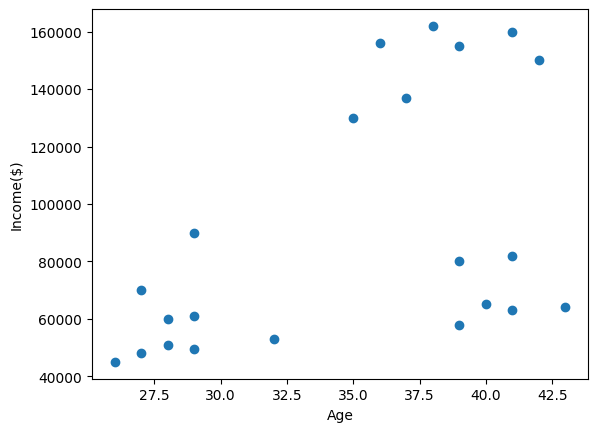

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [5]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [6]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

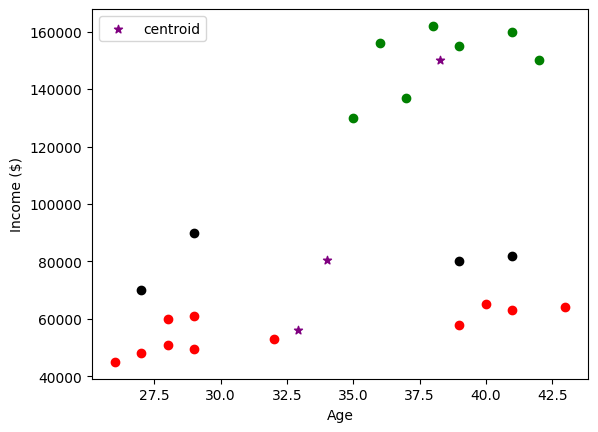

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using min max scaler

In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


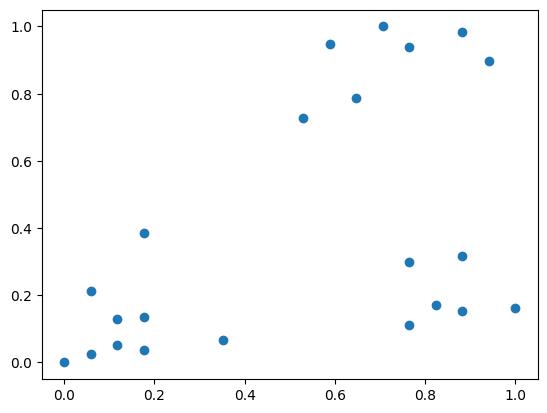

In [10]:
plt.scatter(df.Age,df['Income($)'])

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [13]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

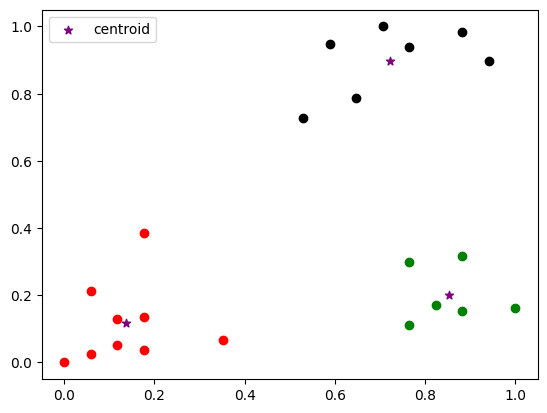

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot

In [15]:
sse = []
k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    numpy_array = np.array(df[['Age','Income($)']])
    km.fit(numpy_array)
    sse.append(km.inertia_)

In [16]:
sse

[2.091136388699078,
 0.4750783498553096,
 0.3881529166478744,
 0.2963623258321304,
 0.22884444183667124,
 0.18279994469329935,
 0.1496440842347003,
 0.10383752586603562]

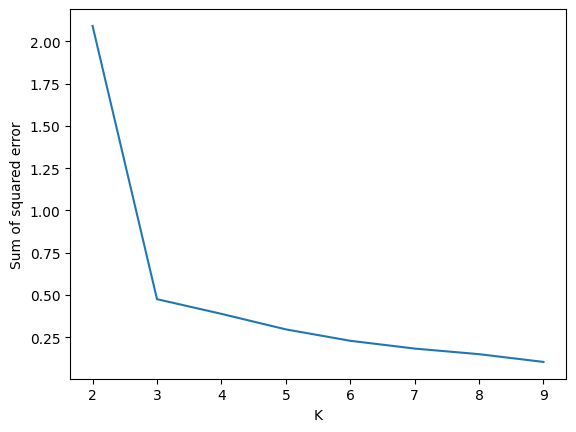

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# NLP Implementation

In [18]:
import pandas as pd
df = pd.read_csv("Movies_Dataset.csv")

In [19]:
df.head()

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...


**Explore the data**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45466 non-null  int64 
 1   title     45460 non-null  object
 2   overview  44507 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


# Data pre-processing

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [22]:
documents = df['overview'].values.astype("U")

In [23]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [24]:
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [25]:
df['cluster'] = model.labels_

In [26]:
df.head()

,id,title,overview,cluster
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",6
1,1,Jumanji,When siblings Judy and Peter discover an encha...,6
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...,2
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",10
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...,3


In [27]:
df19 = df[df.cluster==19]

In [28]:
df19

,id,title,overview,cluster
25,25,Othello,The evil Iago pretends to be friend of Othello...,19
80,80,Things to Do in Denver When You're Dead,A mafia film in Tarantino style with a star-st...,19
122,122,The Star Maker,The adventures and deceptions of a photographe...,19
134,134,From the Journals of Jean Seberg,Mark Rappaport's creative bio-pic about actres...,19
144,144,The Basketball Diaries,Film adaptation of street tough Jim Carroll's ...,19
...,...,...,...,...
45418,45418,Dyketactics,Born in Los Angeles but a New Yorker by choice...,19
45431,45431,Rivers of Sand,The people portrayed in this film are called H...,19
45452,45452,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",19
45454,45454,The Morning After,The Morning After is a feature film that consi...,19


In [29]:
df12 = df[df.cluster==12]

In [30]:
df12

,id,title,overview,cluster
71,71,Kicking and Screaming,"After college graduation, Grover's girlfriend ...",12
218,218,Circle of Friends,'Circle Of Friends' is set in 1950's Ireland. ...,12
287,287,Poison Ivy II: Lily,A young and naive college art student becomes ...,12
353,353,Higher Learning,Malik (Omar Epps) is an African-American stude...,12
419,419,Blue Chips,"Pete Bell, a college basketball coach is under...",12
...,...,...,...,...
44474,44474,Dr. Alien,When the mysterious and sexy Ms. Xenobia takes...,12
44925,44925,The House,When Scott and Kate Johansen�۪s daughter gets ...,12
44985,44985,Nemesis Game,Sara Novak is an introverted college student w...,12
45158,45158,Dying to Belong,When a girls friend is killed by a college haz...,12


# Output the results

In [31]:
# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    print("\n\n**********************\n")
    
    print("Cluster No: "+str(cluster))
    
    print("\n**********************\n\n")

    
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['title','overview']] # get title and overview columns
    print(data)



**********************

Cluster No: 0

**********************


                                  title  \
54                              Georgia   
132                       Sonic Outlaws   
408                            Airheads   
465                       House Party 3   
648                     Billy's Holiday   
...                                 ...   
45311                     Grandma Lo-Fi   
45319  We Don't Care About Music Anyway   
45338    The Land Where the Blues Began   
45365                That Riviera Touch   
45450                  The One-Man Band   

                                                overview  
54     Sadie looks up to her older sister Georgia, a ...  
132    Within days after the release of Negativland's...  
408    The Lone Rangers have heavy-metal dreams and a...  
465    Hip Hop duo Kid &amp; Play return in the secon...  
648    This movie is all about a normal guy called Bi...  
...                                                  ...  
4531

In [32]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 music
 band
 rock
 documentary
 punk
 singer
 concert
 film
 roll
 musical
------------
Cluster 1:
 overview
 available
 movie
 plot
 zwraca
 042
 05
 ۄą
 00
 ݣ1890
------------
Cluster 2:
 family
 home
 father
 life
 son
 mother
 new
 old
 house
 brother
------------
Cluster 3:
 daughter
 mother
 father
 wife
 old
 family
 young
 man
 life
 son
------------
Cluster 4:
 police
 killer
 detective
 serial
 murder
 case
 officer
 cop
 crime
 investigation
------------
Cluster 5:
 war
 world
 ii
 civil
 american
 soldiers
 story
 german
 army
 soldier
------------
Cluster 6:
 young
 world
 story
 town
 time
 people
 documentary
 girl
 years
 wife
------------
Cluster 7:
 husband
 woman
 wife
 young
 life
 married
 new
 marriage
 son
 finds
------------
Cluster 8:
 school
 high
 students
 teacher
 student
 girl
 girls
 new
 year
 old
------------
Cluster 9:
 nan
 1001
 zwraca
 042
 05
 ۄą
 00
 ݣ1890
 ېmovie
 04
------------
Cluster 10:
 friends
 best
 life
 